In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
Player_stats_df = pd.read_csv('Assets/Merged_Player_Stats_Final.csv')

In [4]:
#Lets filter out based on Minutes Played so that we can analyse players that would be considered rotational players and not 'bench warmers'

filtered_merged_df = Player_stats_df[Player_stats_df['MP'] > 150]

# Starting with some of the league wide trends and exploration
### First lets look at some of the most common NBA Player metrics and see how they differ in contract years
### What we expect to see is an increase in performance, but what we might find could be different

Text(0, 0.5, 'Mean Value')

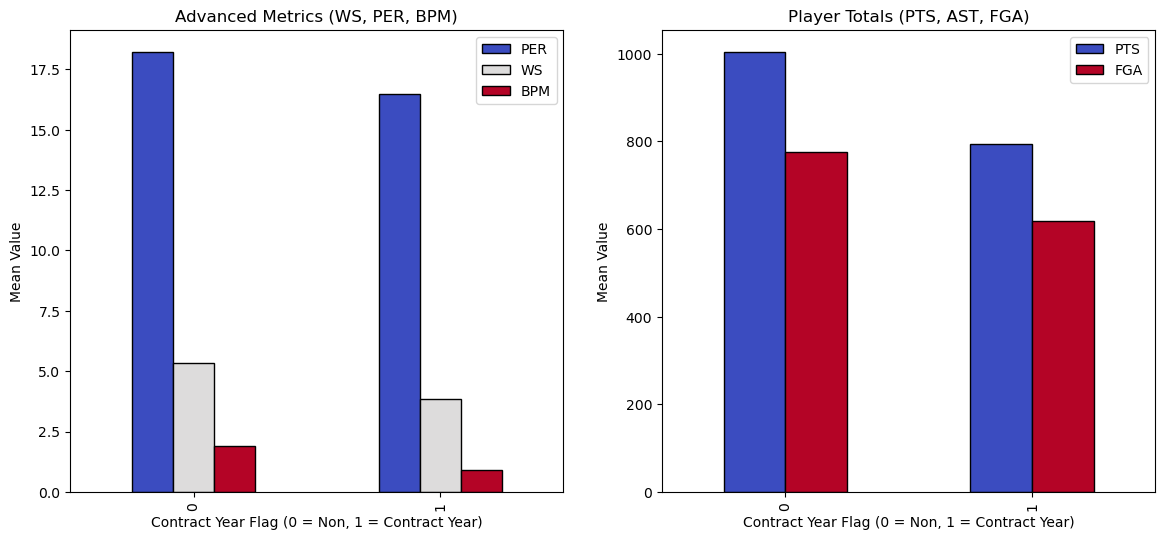

In [5]:
advanced_metrics = ["PER", "WS", "BPM"]
player_metrics = ["PTS","FGA"] 

adv_means = filtered_merged_df.groupby(["CY Flag"])[advanced_metrics].mean()
player_means = filtered_merged_df.groupby(["CY Flag"])[player_metrics].mean()

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
adv_means.plot(kind="bar", colormap="coolwarm", edgecolor="black", ax=axes[0])
axes[0].set_title("Advanced Metrics (WS, PER, BPM)")
axes[0].set_xlabel("Contract Year Flag (0 = Non, 1 = Contract Year)")
axes[0].set_ylabel("Mean Value")

player_means.plot(kind="bar", colormap="coolwarm", edgecolor="black", ax=axes[1])
axes[1].set_title("Player Totals (PTS, AST, FGA)")
axes[1].set_xlabel("Contract Year Flag (0 = Non, 1 = Contract Year)")
axes[1].set_ylabel("Mean Value")

In [6]:
# Here we actually end up seeing a decrease in all player metrics within these contract-years. While we assumed players would player better there may be some other things going on
# one potential factor is play time, and usage. Some of these players are on long term 'super-star' deals, however even more of them are on shorter, veteran/roleplayer deals that 
# are moer likely to be signed near the end of someones career when their performance is either more specialized or not as god as it once was.

# Let's look at Contract Value vs. Win Shares 
### This plot will help us set the scene for out report

In [7]:
# Quick cahnge of the Avg. Value feature to a float so we can use it as scatterplot variable
filtered_merged_df["Avg. Value"] = filtered_merged_df["Avg. Value"].str.replace("[$,]", "", regex=True).astype(float)

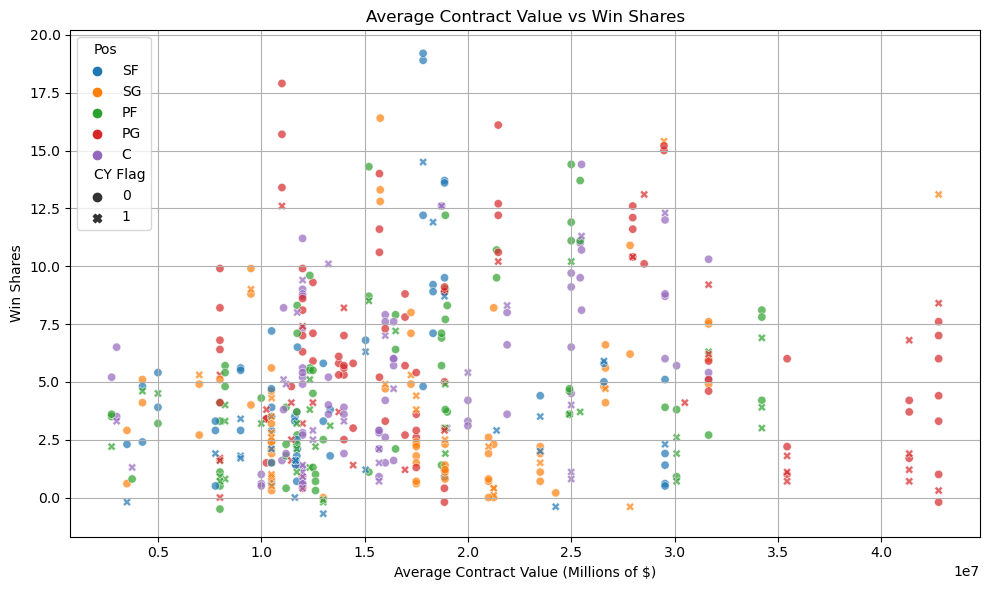

In [8]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_merged_df, x="Avg. Value", y="WS", hue='Pos', style='CY Flag', alpha=0.7)
plt.title("Average Contract Value vs Win Shares")
plt.xlabel("Average Contract Value (Millions of $)")
plt.ylabel("Win Shares")
plt.grid(True)
plt.tight_layout()
plt.show()

# How do player tendencies change when in their contract-year?
### The next two charts will look at some player metrics and how they shift in contract-years vs non-contract-years


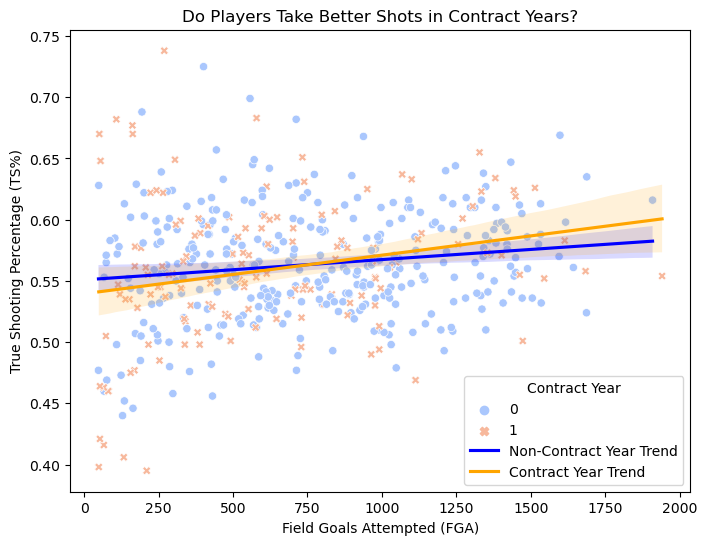

In [9]:
#Here we will plot the shot selections of the players in our data
#The x-axis consists of player Field Goals Attempted(FGA) -- aka the amount of shots they are attempting to make.
# The y-axis shows the players True Shooting %(TS%), a measure of how accurate they are with their shots
#What we might expect to see here is an increase in TS% as players look to take more efficient or less risky shots when in their contract-year

plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_merged_df, x="FGA", y="TS%", hue="CY Flag", style="CY Flag", palette="coolwarm") #create our base scatter plot

#creating linear regression lines to show relation between FGA and TS% 
sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 0], x="FGA", y="TS%", scatter=False, color="blue", label="Non-Contract Year Trend")
sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 1], x="FGA", y="TS%", scatter=False, color="orange", label="Contract Year Trend")


#Add our labels to make it look nice
plt.xlabel("Field Goals Attempted (FGA)")
plt.ylabel("True Shooting Percentage (TS%)")
plt.title("Do Players Take Better Shots in Contract Years?")
plt.legend(title="Contract Year")
plt.show()

In [10]:
# Visualizing if players change their approach to shooting when on their contract years. 
# Are players playing more aggresively/efficiently when on their contract year?
# The trend lines show that low volume scorers actually tend to shoot worse in their contract years whereas high volume scorers shoot slightly better
# This can be seen in both the non-contract years and the contract years but it is exagerated slightly for players in their CY


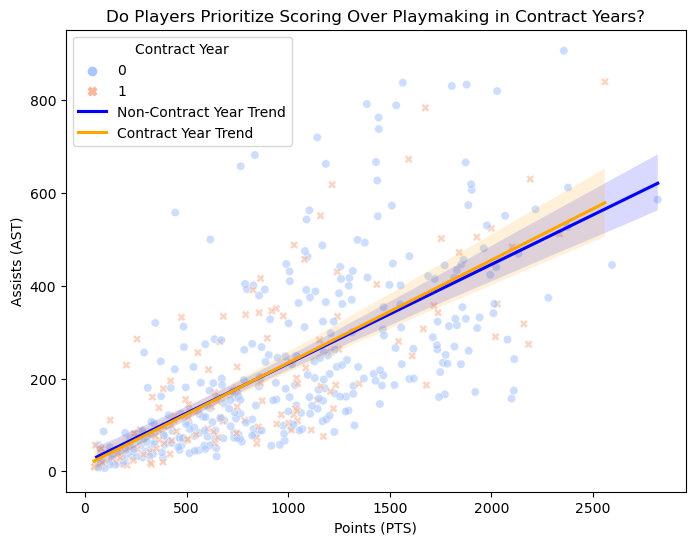

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_merged_df, x="PTS", y="AST", hue="CY Flag", style="CY Flag", palette="coolwarm", alpha=0.6)

# Regression trend lines
sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 0], x="PTS", y="AST", scatter=False, color="blue", label="Non-Contract Year Trend")
sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 1], x="PTS", y="AST", scatter=False, color="orange", label="Contract Year Trend")

plt.xlabel("Points (PTS)")
plt.ylabel("Assists (AST)")
plt.title("Do Players Prioritize Scoring Over Playmaking in Contract Years?")
plt.legend(title="Contract Year")
plt.show()

In [15]:
# Above we see that contract-year players tend to stay consistent with non-contract years. There are slight variations in the trend lines like those seen in the FGA vs. TS% above
# However based on the appearance they are not likely statistically significant. Perhaps a T-Test could be done to compare the differences in the two groups

# Now let's visualize vs. Contract Age


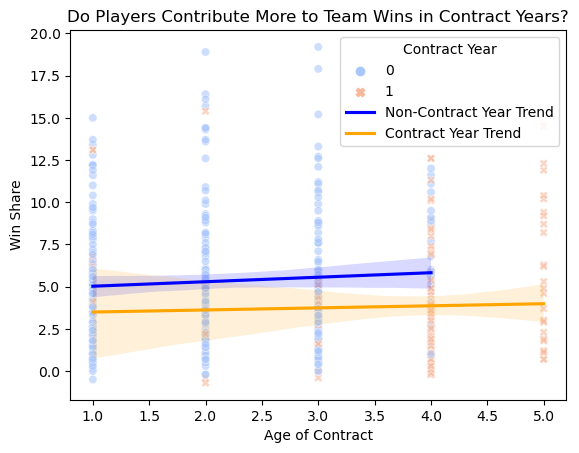

In [12]:
# plt.figure(figsize=(8, 6))

sns.scatterplot(data=filtered_merged_df, x="Contract Age", y="WS", hue="CY Flag", style="CY Flag", palette="coolwarm", alpha=0.6)

# Regression trend lines
sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 0], x="Contract Age", y="WS", scatter=False, color="blue", label="Non-Contract Year Trend")
sns.regplot(data=filtered_merged_df[filtered_merged_df["CY Flag"] == 1], x="Contract Age", y="WS", scatter=False, color="orange", label="Contract Year Trend")

plt.xlabel("Age of Contract")
plt.ylabel("Win Share")
plt.title("Do Players Contribute More to Team Wins in Contract Years?")
plt.legend(title="Contract Year")
plt.show()

In [14]:
# The above plot is a bit hard to look at, we can surely find a better way to visualize this.
# below we will take the same axis but instead use violin plots to visualize not only the differences between noncontract-years and contract-years, 
# but we will also be able to see how the range of Win Share value changes within each year.

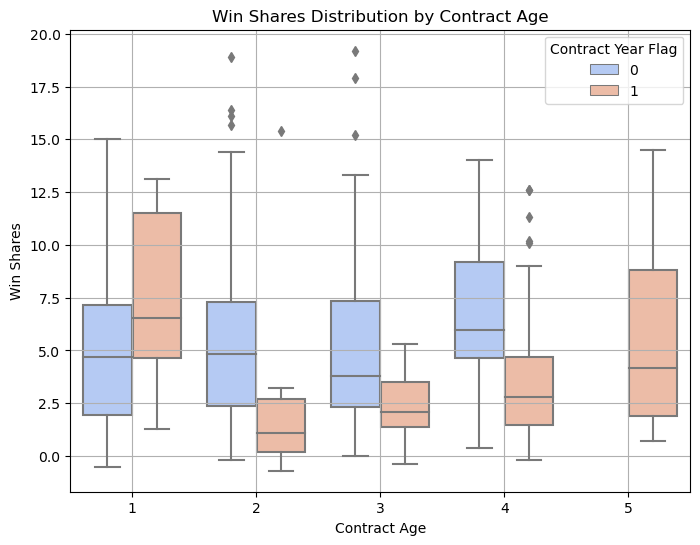

In [13]:
#The above plot looks a little funky due to the distinct values in the scatter plot. Let's try to view this same plot in a slightly different way
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_merged_df, x="Contract Age", y="WS", hue="CY Flag", palette="coolwarm")
plt.title("Win Shares Distribution by Contract Age")
plt.xlabel("Contract Age")
plt.ylabel("Win Shares")
plt.legend(title="Contract Year Flag")
plt.grid(True)
plt.show()